In [37]:
import os
import pandas as pd
import re
import logging
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [70]:
conf_matrix=pd.read_csv('Confusion_matrix/Confusion_matrix_202002210630.csv',index_col=0,dtype={'num_jitters':np.str,'tolerance':np.str})
conf_matrix=conf_matrix.set_index(['num_jitters','tolerance','prediction'],drop=True,append=True)
conf_matrix

P  \
encoding_set                          num_jitters tolerance prediction          
encoding/encoding_cnn_nj1_150p.pickle nj:1        tol:0.1   T             0.0   
                                                            F             0.0   
                                                  tol:0.2   T             0.0   
                                                            F             0.0   
                                                  tol:0.3   T             5.0   
...                                                                       ...   
encoding/encoding_nj1_30p.pickle      nj:1        tol:0.8   F           195.0   
                                                  tol:0.9   T             9.0   
                                                            F           195.0   
                                                  tol:1.0   T             9.0   
                                                            F           195.0   

                                                                            N  
encoding_set                          num_jitters tolerance prediction         
encoding/encoding_cnn_nj1_150p.pickle nj:1        tol:0.1   T           168.0  
                                                            F            36.0  
                                                  tol:0.2   T           168.0  
                                                            F            36.0  
                                                  tol:0.3   T           168.0  
...                                                                       ...  
encoding/encoding_nj1_30p.pickle      nj:1        tol:0.8   F             0.0  
                                                  tol:0.9   T             0.0  
                                                            F             0.0  
                                                  tol:1.0   T             0.0  
                                                            F             0.0  

[100 rows x 2 columns]

In [71]:
idx=pd.IndexSlice
all_li=[conf_matrix.loc[idx[:,:,[f'tol:{_/10}'],:],:].sum().sum() for _ in range(1,11)]
all_li

[1020.0, 1020.0, 1019.0, 1015.0, 976.0, 911.0, 851.0, 818.0, 816.0, 816.0]

In [64]:
acc=[(conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'P'].values.item()+conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'N'].values.item())/conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],:],:].sum().sum() for tol in range(1,11)]

prec=[conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'P'].values.item()/(conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'P'].values.item()+conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'F'],'P'].values.item()) for tol in range(3,11)]
prec=[1.0,1.0]+prec

rec=[conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'P'].values.item()/(conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'P'].values.item()+conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'F'],'N'].values.item()) for tol in range(1,11)]

f1=2*np.array(prec)*np.array(rec)/(np.array(rec)+np.array(prec))

fpr=[conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'F'],'P'].values.item()/(conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'T'],'N'].values.item()+conf_matrix.loc[idx[:,:,[f'tol:{tol/10}'],'F'],'P'].values.item()) for tol in range(1,11)]



print(f'Accuracy : {acc}\n\nPrecision : {prec}\n\nRecall : {rec}\n\nF1 score : {f1}\n\n1FPR : {fpr}')

ValueError: can only convert an array of size 1 to a Python scalar

In [65]:
[conf_matrix.loc[idx['encoding/encoding_cnn_nj1_150p.pickle',:,[f'tol:{_/10}'],:],:].sum().sum() for _ in range(1,11)]

[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0]

In [66]:
[conf_matrix.loc[idx['encoding/encoding_cnn_nj1_297p.pickle',:,[f'tol:{_/10}'],:],:].sum().sum() for _ in range(1,11)]

[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0]

In [81]:
[conf_matrix.loc[idx['encoding/encoding_nj1_30p.pickle',:,[f'tol:{_/10}'],:],:].sum().sum() for _ in range(1,11)]

[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0]

In [69]:
[conf_matrix.loc[idx['encoding/encoding_cnn_nj1_3p.pickle',:,[f'tol:{_/10}'],:],:].sum().sum() for _ in range(1,11)]

[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0]

In [13]:
conf_matrix.loc[idx['encoding/encoding_nj1_30p.pickle',:,:,:],:]

P      N
encoding_set                     num_jitters tolerance prediction             
encoding/encoding_nj1_30p.pickle nj:1        tol:0.1   T            0.0  168.0
                                                       F            0.0   36.0
                                             tol:0.2   T            0.0  168.0
                                                       F            0.0   36.0
                                             tol:0.3   T            0.0  168.0
                                                       F            0.0   35.0
                                             tol:0.4   T           16.0  164.0
                                                       F            2.0   12.0
                                             tol:0.5   T           17.0   97.0
                                                       F           24.0    2.0
                                             tol:0.6   T           11.0   19.0
                                                       F           27.0    0.0
                                             tol:0.7   T            5.0    0.0
                                                       F           11.0    0.0
                                             tol:0.8   T            0.0    0.0
                                                       F            0.0    0.0
                                             tol:0.9   T            0.0    0.0
                                                       F            0.0    0.0
                                             tol:1.0   T            0.0    0.0
                                                       F            0.0    0.0

Text(0.5, 0, 'Tolerance')

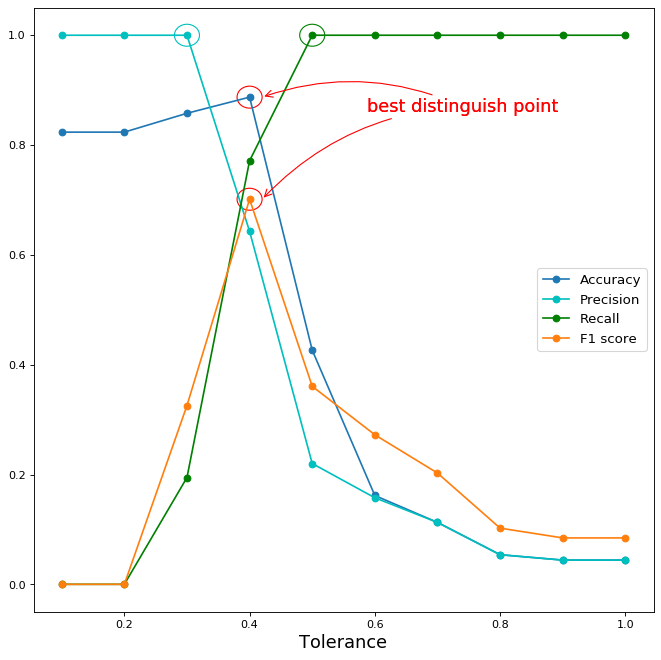

In [9]:
%matplotlib inline
# %matplotlib notebook
figure(figsize=(10, 10), dpi=80)
x=[i/10 for i in range(1,11)]
plt.plot(x, acc,'-o',label='Accuracy')
plt.plot(x, prec,'-oc',label='Precision')
plt.plot(x, rec,'-og',label='Recall')
plt.plot(x, f1,'-o',label='F1 score')
fig = plt.gcf()
ax = fig.gca()
circle_acc = plt.Circle((x[3], acc[3]), 0.02, color='red', fill=False)
circle_prec = plt.Circle((x[2], prec[2]), 0.02, color='c', fill=False)
circle_rec = plt.Circle((x[4], rec[4]), 0.02, color='green', fill=False)
circle_f1 = plt.Circle((x[3], f1[3]), 0.02, color='red', fill=False)
ax.add_artist(circle_prec)
ax.add_artist(circle_rec)
ax.add_artist(circle_acc)
ax.add_artist(circle_f1)
ax.annotate(f'best distinguish point', xy=(x[3]+0.02, acc[3]), xycoords='data', xytext=(300, 450),
             textcoords='axes points', fontsize=16,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2", color='red'), color='red')
ax.annotate(f'best distinguish point', xy=(x[3]+0.02, f1[3]), xycoords='data', xytext=(300, 450),
             textcoords='axes points', fontsize=16,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2", color='red'), color='red')
plt.legend(fontsize=12)
plt.xlabel('Tolerance',fontsize=16)


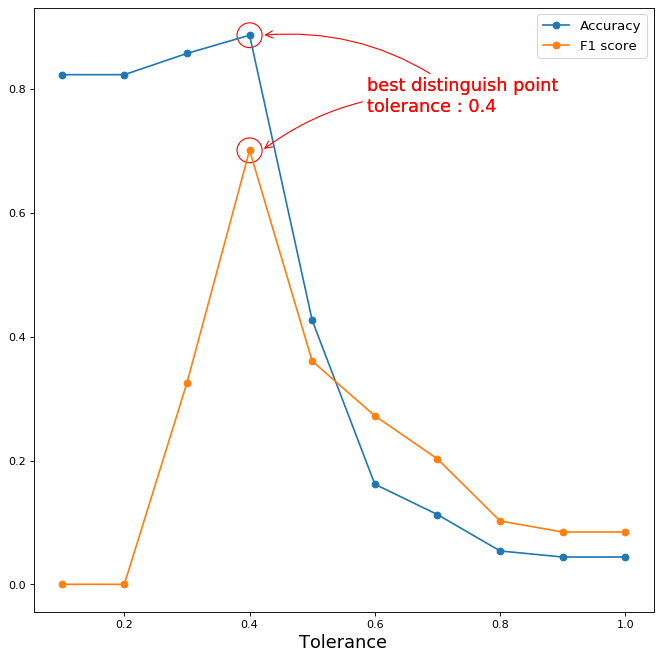

In [10]:
%matplotlib inline
# %matplotlib notebook
figure(figsize=(10, 10), dpi=80)
x=[i/10 for i in range(1,11)]
plt.plot(x, acc,'-o',label='Accuracy')
plt.plot(x, f1,'-o',label='F1 score')
fig = plt.gcf()
ax = fig.gca()

circle_acc = plt.Circle((x[3], acc[3]), 0.02, color='red', fill=False)
circle_f1 = plt.Circle((x[3], f1[3]), 0.02, color='red', fill=False)
ax.add_artist(circle_acc)
ax.add_artist(circle_f1)
ax.annotate(f'best distinguish point\ntolerance : 0.4', xy=(x[3]+0.02, acc[3]), xycoords='data', xytext=(300, 450),
             textcoords='axes points', fontsize=16,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2", color='red'), color='red')
ax.annotate(f'best distinguish point\ntolerance : 0.4', xy=(x[3]+0.02, f1[3]), xycoords='data', xytext=(300, 450),
             textcoords='axes points', fontsize=16,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2", color='red'), color='red')
plt.legend(fontsize=12)
plt.xlabel('Tolerance',fontsize=16)
plt.savefig('Acc_F1.jpg')
plt.show()

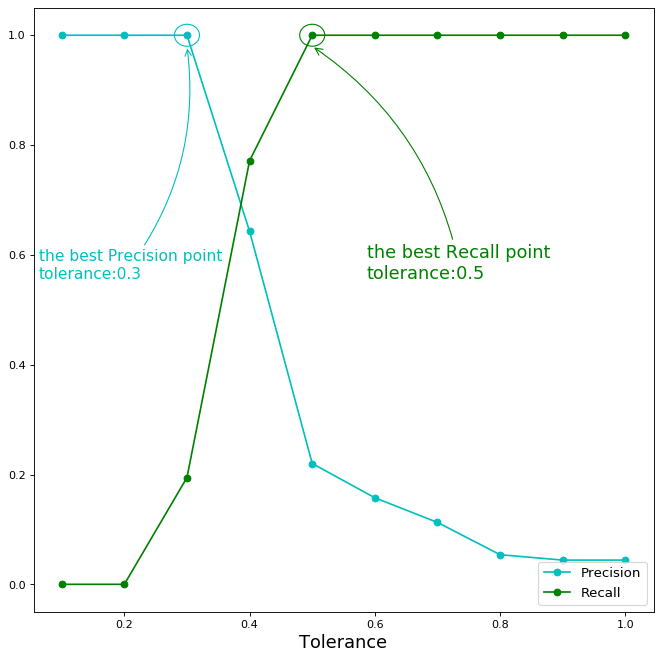

In [11]:
%matplotlib inline
# %matplotlib notebook
figure(figsize=(10, 10), dpi=80)
x=[i/10 for i in range(1,11)]
plt.plot(x, prec,'-oc',label='Precision')
plt.plot(x, rec,'-og',label='Recall')
fig = plt.gcf()
ax = fig.gca()
circle_prec = plt.Circle((x[2], prec[2]), 0.02, color='c', fill=False)
circle_rec = plt.Circle((x[4], rec[4]), 0.02, color='green', fill=False)
ax.add_artist(circle_rec)
ax.add_artist(circle_prec)
ax.annotate(f'the best Precision point\ntolerance:0.3', xy=(x[2], prec[2]-0.02), xycoords='data', xytext=(5, 300),
             textcoords='axes points', fontsize=14,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2", color='c'), color='c')
ax.annotate(f'the best Recall point\ntolerance:0.5', xy=(x[4], rec[4]-0.02), xycoords='data', xytext=(300, 300),
             textcoords='axes points', fontsize=16,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2", color='g'), color='g')
plt.legend(fontsize=12)
plt.xlabel('Tolerance',fontsize=16)
plt.savefig('Prec_Rec.jpg')
plt.show()

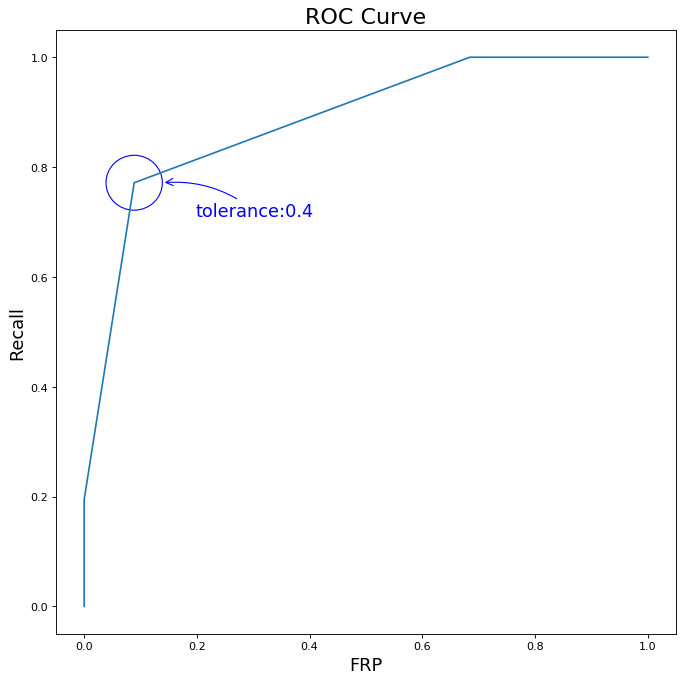

In [13]:
%matplotlib inline
figure(figsize=(10, 10), dpi=80)

plt.plot(fpr,rec)
plt.title("ROC Curve",fontsize=20)
plt.xlabel("FRP",fontsize=16)
plt.ylabel("Recall",fontsize=16)
fig = plt.gcf()
ax = fig.gca()
circle1 = plt.Circle((fpr[3], rec[3]), 0.05, color='b', fill=False)
ax.add_artist(circle1)
ax.annotate(f'tolerance:0.4', xy=(fpr[3]+0.05, rec[3]), xycoords='data', xytext=(30, -30),
             textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2",color='b'),color='b')
plt.savefig('ROC_Curve.jpg')
plt.show()

In [15]:
timing_table=pd.read_csv('timing_log_202002182010.csv',index_col=0)
timing_table

,num_jitters,tolerance,loading,encoding,comparing,total
encoding_set,,,,,,
encoding/encoding3.pickle,nj:1,tol:0.1,0.678979,403.660467,0.164508,404.503953
encoding/encoding3.pickle,nj:1,tol:0.2,0.669459,403.040140,0.167994,403.877593
encoding/encoding3.pickle,nj:1,tol:0.3,0.686986,401.960360,0.160471,402.807817
encoding/encoding3.pickle,nj:1,tol:0.4,0.661400,402.028969,0.144920,402.835289
encoding/encoding3.pickle,nj:1,tol:0.5,0.664364,402.819642,0.142287,403.626293
encoding/encoding3.pickle,nj:1,tol:0.6,0.653350,405.076072,0.130089,405.859511
encoding/encoding3.pickle,nj:1,tol:0.7,0.688630,407.111040,0.125629,407.925299
encoding/encoding3.pickle,nj:1,tol:0.8,0.678066,406.841036,0.124433,407.643535
encoding/encoding3.pickle,nj:1,tol:0.9,0.681833,402.379956,0.144540,403.206328


In [20]:
encoding_time=timing_table['encoding'].values.tolist()
comparing_time=timing_table['comparing'].values.tolist()
loading_time=timing_table['loading'].values.tolist()
print(f'encoding time : {encoding_time}\n\ncomparing time : {comparing_time}\n\nloading time : {loading_time}')

encodingtime : [403.66046714782686, 403.0401396751403, 401.96035957336426, 402.0289692878723, 402.8196415901184, 405.0760719776153, 407.1110398769378, 406.8410360813141, 402.37995576858526, 399.0066106319428]

comparing time : [0.16450762748718262, 0.16799449920654294, 0.16047120094299314, 0.14491987228393555, 0.14228701591491694, 0.13008880615234375, 0.12562918663024905, 0.12443304061889653, 0.14453983306884766, 0.16908168792724607]

loading time : [0.6789786815643313, 0.6694591045379639, 0.6869864463806155, 0.6613996028900149, 0.6643643379211426, 0.6533498764038086, 0.6886303424835205, 0.6780662536621094, 0.6818325519561771, 0.6967976093292239]


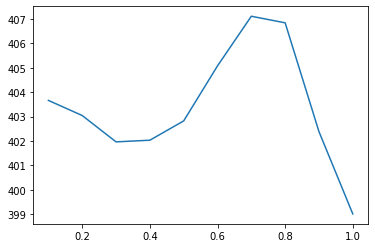

In [22]:
x=[_/10 for _ in range(1,11)]
plt.plot(x,encoding_time)
plt.show()

In [52]:
timing_log=pd.read_csv('timing_log/timing_log_202002200417.csv',index_col=0,dtype={'num_jitters':np.str,'tolerance':np.str})
timing_log=timing_log.set_index(['num_jitters','tolerance'],drop=True,append=True)
timing_log

loading  detecting  \
encoding_set                      num_jitters tolerance                        
encoding/encoding_nj1_150p.pickle nj:1        tol:0.1    0.683613        NaN   
                                              tol:0.2    0.676272        NaN   
                                              tol:0.3    0.684865        NaN   
                                              tol:0.4    0.706048        NaN   
                                              tol:0.5    0.692002        NaN   
                                              tol:0.6    0.692566        NaN   
                                              tol:0.7    0.650250        NaN   
                                              tol:0.8    0.684796        NaN   
                                              tol:0.9    0.680121        NaN   
                                              tol:1.0    0.697347        NaN   
encoding/encoding_nj1_297p.pickle nj:1        tol:0.1    0.687671        NaN   
                                              tol:0.2    0.684260        NaN   
                                              tol:0.3    0.674675        NaN   
                                              tol:0.4    0.694364        NaN   
                                              tol:0.5    0.689257        NaN   
                                              tol:0.6    0.697831        NaN   
                                              tol:0.7    0.691091        NaN   
                                              tol:0.8    0.682533        NaN   
                                              tol:0.9    0.705540        NaN   
                                              tol:1.0    0.692215        NaN   
encoding/encoding_nj1_30p.pickle  nj:1        tol:0.1    0.684836        NaN   
                                              tol:0.2    0.657912        NaN   
                                              tol:0.3    0.660015        NaN   
                                              tol:0.4    0.677273        NaN   
                                              tol:0.5    0.684174        NaN   
                                              tol:0.6    0.664254        NaN   
                                              tol:0.7    0.663663        NaN   
                                              tol:0.8    0.662551        NaN   
                                              tol:0.9    0.642297        NaN   
                                              tol:1.0    0.667548        NaN   
encoding/encoding_nj1_3p.pickle   nj:1        tol:0.1    0.677993        NaN   
                                              tol:0.2    0.656810        NaN   
                                              tol:0.3    0.662629        NaN   
                                              tol:0.4    0.678157        NaN   
                                              tol:0.5    0.660441        NaN   
                                              tol:0.6    0.637397        NaN   
                                              tol:0.7    0.674608        NaN   
                                              tol:0.8    0.667158        NaN   
                                              tol:0.9    0.682583        NaN   
                                              tol:1.0    0.670837        NaN   

                                                         encoding  comparing  \
encoding_set                      num_jitters tolerance                        
encoding/encoding_nj1_150p.pickle nj:1        tol:0.1    4.430023   0.107459   
                                              tol:0.2    4.387439   0.096510   
                                              tol:0.3    4.492168   0.120757   
                                              tol:0.4    4.590474   0.122635   
                                              tol:0.5    4.617860   0.114487   
                                              tol:0.6    4.520315   0.099656   
                                              tol:0.7    

In [299]:
timing_log.loc[('encoding/encoding3.pickle','1','0.5'),'loading']=0.5
timing_log

/usr/local/lib/python3.6/dist-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


loading  encoding  comparing  \
encoding_set              num_jitters tolerance                                 
encoding/encoding3.pickle 1           0.1            0.0       0.0        0.0   
                                      0.2            0.0       0.0        0.0   
                                      0.3            0.0       0.0        0.0   
                                      0.4            0.0       0.0        0.0   
                                      0.5            0.5       0.0        0.0   
                                      0.6            0.0       0.0        0.0   
                                      0.7            0.0       0.0        0.0   
                                      0.8            0.0       0.0        0.0   
                                      0.9            0.0       0.0        0.0   
                                      1.0            0.0       0.0        0.0   
                                      0.1            0.0       0.0        0.0   

                                                 total  
encoding_set              num_jitters tolerance         
encoding/encoding3.pickle 1           0.1          0.0  
                                      0.2          0.0  
                                      0.3          0.0  
                                      0.4          0.0  
                                      0.5          0.0  
                                      0.6          0.0  
                                      0.7          0.0  
                                      0.8          0.0  
                                      0.9          0.0  
                                      1.0          0.0  
                                      0.1          0.0

In [274]:
tl=0.1
te=0.2
tc=0.05
tt=tl+te+tc
args={}
args["encodings"]='encoding/encoding3.pickle'
num_jitters=1
args["tolerance"]=0.1
over_write_timing_csv=False
while not over_write_timing_csv:
    try:
        tl_row=timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'loading']
        logging.debug(f'start over writing timing_log.csv\n')
        te_row=timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'encoding']
        tc_row=timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'comparing']
        tt_row=timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'total']

        tl_row=tl+tl_row
        te_row=te+te_row
        tc_row=tc+tc_row
        tt_row=tt+tt_row
        logging.debug(f'\n{timing_log}\n')
        timing_log.to_csv(os.path.dirname(os.path.abspath(__file__))+'/examples/exampleSet/timing_log.csv',index=True,header=True)
        logging.info('timing_log.csv has been over write')
        over_write_timing_csv=True
    except:
        logging.debug(f'revise timing_log.csv unassigned rows\n')
        timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'loading']=0
        timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'encoding']=0
        timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'comparing']=0
        timing_log.loc[(f'{args["encodings"]}',f'{num_jitters}',f'{args["tolerance"]}'),'total']=0
        logging.debug(f'finish revise timing_log.csv unassigned rows\n')

KeyError: "['1' '0.1'] not in index"

In [34]:
def squqre_series(x):
    for _ in range(x):
        x=_**2
    yield x

b=squqre_series(8)
list(b)

[49]

In [39]:
def new_range(n):
    i = 0
    while i < n:
        i += 1
        yield i

b = new_range(10)
print(next(b))
print(next(b))
print(next(b))
print(next(b))

1
2
3
4


In [55]:
def fib2(n):
    i, a, b = 0, 0, 1
    while True:
        if n <= 0 or i == n:
            break
        a, b = b, a + b
        i += 1
        yield a
d = fib2(10)
print(list(d))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [54]:
def fib(n):
    i, a, b = 0, 0, 1
    while True:
        if n <= 0 or i == n:
            break
        a, b = b, a + b
        i += 1
    return a

print(fib(10))

55


In [ ]:
conf_matrix.to_csv('Confusion_matrix.csv',index=True,header=True) 